1. Plot the traffic volume over time by considering all captured packets within the most appropriate time interval.

/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_2483/4063166300.py:5: FutureWarning: Parsing 'EET' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead
  df = pd.read_csv('traffic_data.csv', names=['frame.time', 'frame.len'], parse_dates=['frame.time'])


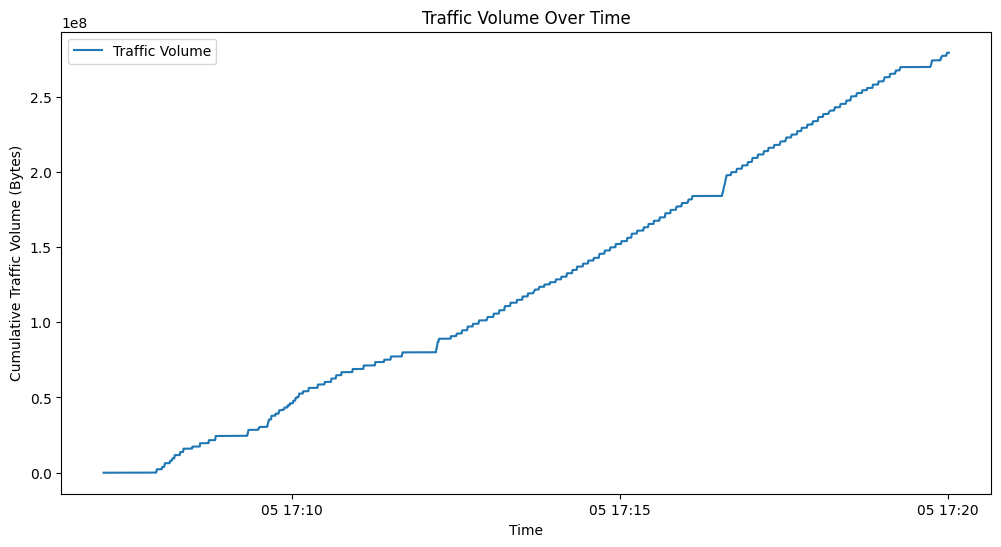

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV data into a DataFrame with headers
df = pd.read_csv('traffic_data.csv', names=['frame.time', 'frame.len'], parse_dates=['frame.time'])

# Plot the traffic volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['frame.time'], df['frame.len'].cumsum(), label='Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Cumulative Traffic Volume (Bytes)')
plt.title('Traffic Volume Over Time')
plt.legend()
plt.show()


2. Plot the traffic volume without the ping packets and iperf3 packets over time (select the same interval selected in the previous plot).

/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_2483/1584278598.py:5: FutureWarning: Parsing 'EET' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead
  df = pd.read_csv('traffic_data.csv', names=['frame.time', 'frame.len'], parse_dates=['frame.time'])


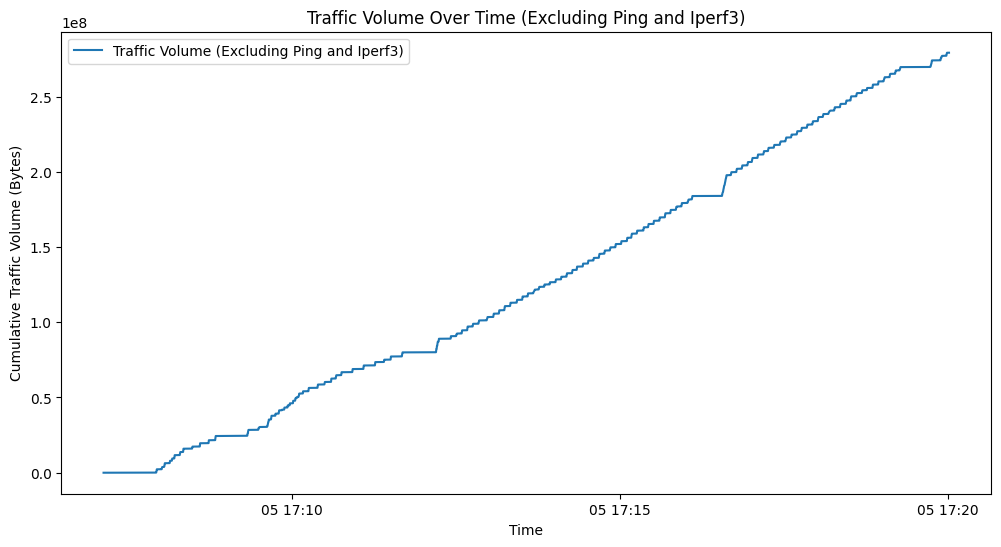

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV data into a DataFrame with headers
df = pd.read_csv('traffic_data.csv', names=['frame.time', 'frame.len'], parse_dates=['frame.time'])

# Exclude ping (frame length 98) and iperf3 (frame length 66) packets
filtered_df = df[~df['frame.len'].isin(['98', '66'])]

# Plot the traffic volume over time without ping and iperf3 packets
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['frame.time'], filtered_df['frame.len'].cumsum(), label='Traffic Volume (Excluding Ping and Iperf3)')
plt.xlabel('Time')
plt.ylabel('Cumulative Traffic Volume (Bytes)')
plt.title('Traffic Volume Over Time (Excluding Ping and Iperf3)')
plt.legend()
plt.show()


3. Plot the traffic volume comparing the ping packets with the iperf3 packets over time (keeping the same interval).

/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_2483/4241134690.py:5: FutureWarning: Parsing 'EET' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead
  df = pd.read_csv('traffic_data.csv', names=['frame.time', 'frame.len'], parse_dates=['frame.time'])


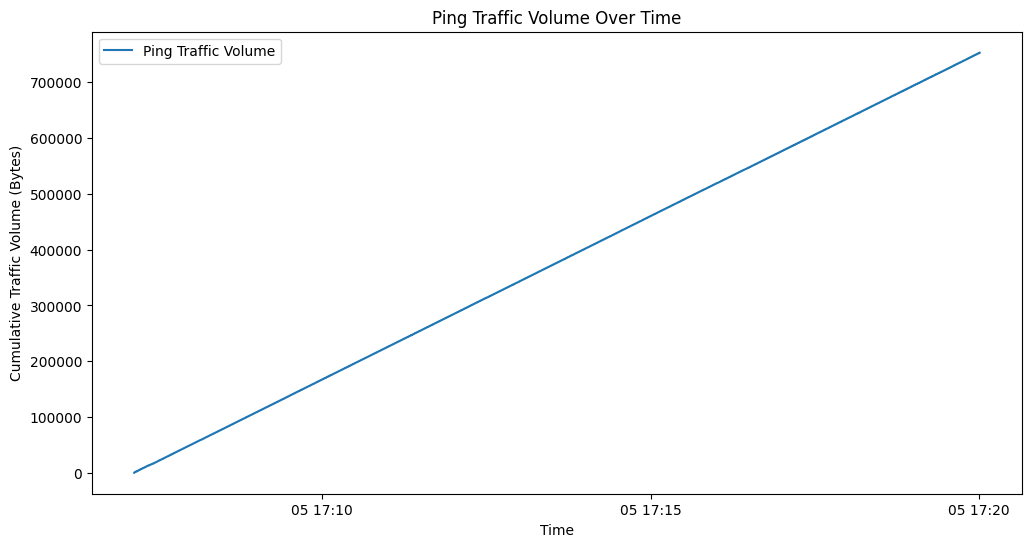

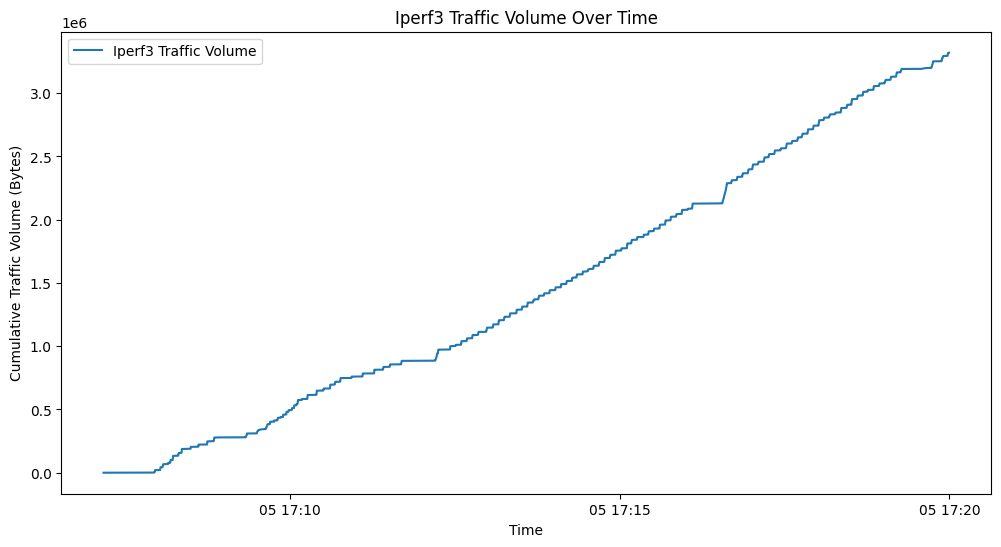

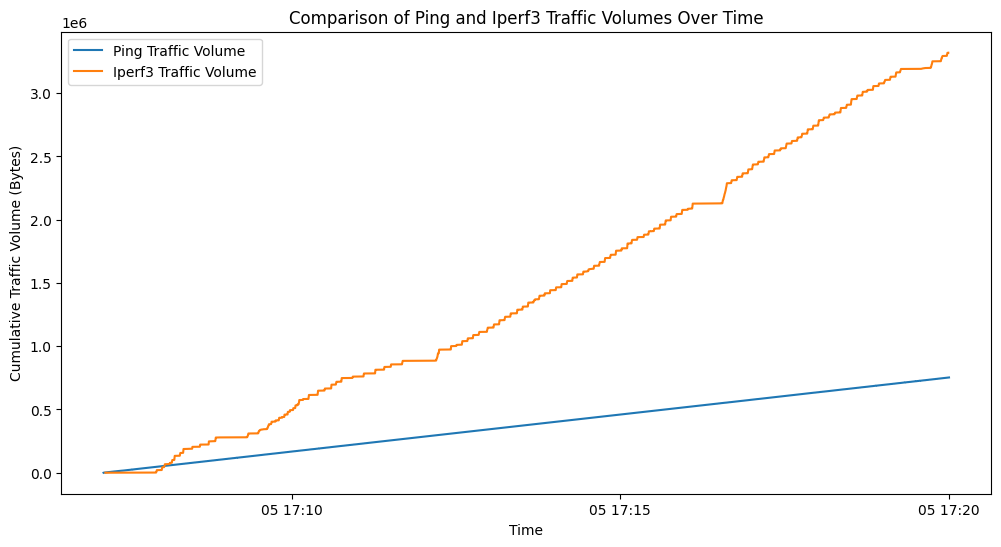

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV data into a DataFrame with headers
df = pd.read_csv('traffic_data.csv', names=['frame.time', 'frame.len'], parse_dates=['frame.time'])

# Separate ping and iperf3 packets
ping_df = df[df['frame.len'] == 98]
iperf3_df = df[df['frame.len']== 66]

# Plot the traffic volume over time for ping packets
plt.figure(figsize=(12, 6))
plt.plot(ping_df['frame.time'], ping_df['frame.len'].cumsum(), label='Ping Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Cumulative Traffic Volume (Bytes)')
plt.title('Ping Traffic Volume Over Time')
plt.legend()
plt.show()

# Plot the traffic volume over time for iperf3 packets
plt.figure(figsize=(12, 6))
plt.plot(iperf3_df['frame.time'], iperf3_df['frame.len'].cumsum(), label='Iperf3 Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Cumulative Traffic Volume (Bytes)')
plt.title('Iperf3 Traffic Volume Over Time')
plt.legend()
plt.show()

# Overlay both plots for comparison
plt.figure(figsize=(12, 6))
plt.plot(ping_df['frame.time'], ping_df['frame.len'].cumsum(), label='Ping Traffic Volume')
plt.plot(iperf3_df['frame.time'], iperf3_df['frame.len'].cumsum(), label='Iperf3 Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Cumulative Traffic Volume (Bytes)')
plt.title('Comparison of Ping and Iperf3 Traffic Volumes Over Time')
plt.legend()
plt.show()


4. Provide the average throughput.

In [8]:
import pandas as pd

# Load CSV data into a DataFrame with headers
df = pd.read_csv('traffic_data.csv', names=['frame.time', 'frame.len'], parse_dates=['frame.time'])

# Exclude ping (frame length 98) and iperf3 (frame length 66) packets
filtered_df = df[~df['frame.len'].isin(['98', '66'])]

# Calculate total data transferred
total_data_transferred = filtered_df['frame.len'].sum()  # Assuming frame.len represents the size of packets in bytes

# Calculate the duration of the capture in seconds
duration_seconds = (filtered_df['frame.time'].max() - filtered_df['frame.time'].min()).total_seconds()

# Calculate average throughput (in bytes per second)
average_throughput = total_data_transferred / duration_seconds

print(f"Total Data Transferred: {total_data_transferred} bytes")
print(f"Capture Duration: {duration_seconds} seconds")
print(f"Average Throughput: {average_throughput} bytes per second")

/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_2483/2578190818.py:4: FutureWarning: Parsing 'EET' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead
  df = pd.read_csv('traffic_data.csv', names=['frame.time', 'frame.len'], parse_dates=['frame.time'])


Total Data Transferred: 279115739 bytes
Capture Duration: 772.515119 seconds
Average Throughput: 361307.8011486789 bytes per second


How much traffic was there that was not iperf or ping traffic?

In [12]:
import pandas as pd

# Load flow data from CSV
flow_data = pd.read_csv('traffic_data.csv', names=['frame.time', 'frame.len'], parse_dates=['frame.time'])

iperf_flows = flow_data[flow_data['frame.len'] == 66]

# Filter out ping flows (e.g., using ICMP protocol)
ping_flows = flow_data[flow_data['frame.len'] == 98]

# Calculate remaining traffic
remaining_traffic = flow_data[~flow_data.index.isin(iperf_flows.index) & ~flow_data.index.isin(ping_flows.index)]

# Print summary
print(f"Total traffic volume: {flow_data['frame.len'].sum()} bytes")
print(f"Iperf traffic volume: {iperf_flows['frame.len'].sum()} bytes")
print(f"Ping traffic volume: {ping_flows['frame.len'].sum()} bytes")
print(f"Remaining traffic volume: {remaining_traffic['frame.len'].sum()} bytes")


/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_2483/715594736.py:4: FutureWarning: Parsing 'EET' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead
  flow_data = pd.read_csv('traffic_data.csv', names=['frame.time', 'frame.len'], parse_dates=['frame.time'])


Total traffic volume: 279115739 bytes
Iperf traffic volume: 3320394 bytes
Ping traffic volume: 753032 bytes
Remaining traffic volume: 275042313 bytes


 In the case of the ping results, extract ICMP messages from traces or flows, correlate requests to responses and calculate delay and identify possible packet loss.

In [15]:
import re
from datetime import datetime

# Read the ICMP messages file
with open('ping_bcn_output.txt', 'r') as file:
    lines = file.readlines()

# Initialize variables
requests = {}
delays = []

# Parse ICMP messages
for line in lines:
    match = re.search(r'(\d+\.\d+) IP (.+?) > (.+?): ICMP echo request, id (\d+), seq (\d+)', line)
    if match:
        timestamp, src, dst, request_id, seq = match.groups()
        requests[request_id + seq] = {'timestamp': float(timestamp), 'seq': seq}
    else:
        match = re.search(r'(\d+\.\d+) IP (.+?) > (.+?): ICMP echo reply, id (\d+), seq (\d+)', line)
        if match:
            timestamp, src, dst, request_id, seq = match.groups()
            if request_id + seq in requests:
                request_time = requests[request_id + seq]['timestamp']
                reply_time = float(timestamp)
                delay = reply_time - request_time
                delays.append(delay)

# Calculate average delay and packet loss
average_delay = sum(delays) / len(delays) if delays else 0
packet_loss = 1 - len(delays) / len(requests) if len(requests) != 0 else 0

print(f'Average Delay: {average_delay} seconds')
print(f'Packet Loss: {packet_loss * 100}%')


Average Delay: 0 seconds
Packet Loss: 0%


In [16]:
import re
from datetime import datetime

# Read the ICMP messages file
with open('ping_blr1_output.txt', 'r') as file:
    lines = file.readlines()

# Initialize variables
requests = {}
delays = []

# Parse ICMP messages
for line in lines:
    match = re.search(r'(\d+\.\d+) IP (.+?) > (.+?): ICMP echo request, id (\d+), seq (\d+)', line)
    if match:
        timestamp, src, dst, request_id, seq = match.groups()
        requests[request_id + seq] = {'timestamp': float(timestamp), 'seq': seq}
    else:
        match = re.search(r'(\d+\.\d+) IP (.+?) > (.+?): ICMP echo reply, id (\d+), seq (\d+)', line)
        if match:
            timestamp, src, dst, request_id, seq = match.groups()
            if request_id + seq in requests:
                request_time = requests[request_id + seq]['timestamp']
                reply_time = float(timestamp)
                delay = reply_time - request_time
                delays.append(delay)

# Calculate average delay and packet loss
average_delay = sum(delays) / len(delays) if delays else 0
packet_loss = 1 - len(delays) / len(requests) if len(requests) != 0 else 0

print(f'Average Delay: {average_delay} seconds')
print(f'Packet Loss: {packet_loss * 100}%')


Average Delay: 0 seconds
Packet Loss: 0%


In [18]:
import re
from datetime import datetime

# Read the ICMP messages file
with open('ping_mnl_output.txt', 'r') as file:
    lines = file.readlines()

# Initialize variables
requests = {}
delays = []

# Parse ICMP messages
for line in lines:
    match = re.search(r'(\d+\.\d+) IP (.+?) > (.+?): ICMP echo request, id (\d+), seq (\d+)', line)
    if match:
        timestamp, src, dst, request_id, seq = match.groups()
        requests[request_id + seq] = {'timestamp': float(timestamp), 'seq': seq}
    else:
        match = re.search(r'(\d+\.\d+) IP (.+?) > (.+?): ICMP echo reply, id (\d+), seq (\d+)', line)
        if match:
            timestamp, src, dst, request_id, seq = match.groups()
            if request_id + seq in requests:
                request_time = requests[request_id + seq]['timestamp']
                reply_time = float(timestamp)
                delay = reply_time - request_time
                delays.append(delay)

# Calculate average delay and packet loss
average_delay = sum(delays) / len(delays) if delays else 0
packet_loss = 1 - len(delays) / len(requests) if len(requests) != 0 else 0

print(f'Average Delay: {average_delay} seconds')
print(f'Packet Loss: {packet_loss * 100}%')


Average Delay: 0 seconds
Packet Loss: 0%


In [20]:
import pandas as pd

# Read the iperf3 output file
with open('iperf_ok1_output.txt', 'r') as file:
    iperf_output = file.readlines()

# Extract the relevant throughput information
throughput_line = [line for line in iperf_output if 'sender' in line][0]
throughput_values = throughput_line.split()

# Extract the throughput value (bits/sec) and convert to Mbits/sec
throughput_bits_per_sec = float(throughput_values[6])
throughput_Mbits_per_sec = throughput_bits_per_sec / 10**6

# Print the calculated throughput
print(f"Throughput: {throughput_Mbits_per_sec} Mbits/sec")

Throughput: 1.31e-05 Mbits/sec
